Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Pandas File/bank.csv')
print (df)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [ ]:
for col in object_cols:
    print(df[col].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
df_num = df.select_dtypes(exclude='object')
df_num.to_csv('/content/drive/MyDrive/Pandas File/banknumericdata.csv', index=False)
print(df_num)

       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]


In [ ]:
df_num = pd.read_csv('/content/drive/MyDrive/Pandas File/banknumericdata.csv')
print(df_num.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pandas File/medical_students_dataset.csv')
print(df)

        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   NaN    Male  152.069157  47.630941          B        NaN   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female         NaN  46.234173          O        NaN   
...            ...   ...     ...         ...        ...        ...        ...   
199995         NaN  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194        NaN  16.831734   
199997     99998.0  34.0  Female         NaN  99.648914        NaN  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.175189   

        Temperature  Heart 

In [ ]:
df.info()
missing = df.isnull().sum()
print(missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BM

In [ ]:
for c in df.columns:
    if df[c].isnull().sum() > 0:
        if df[c].dtype == "object":
            df[c] = df[c].fillna(df[c].mode()[0])
        else:
            df[c] = df[c].fillna(df[c].mean())
print(df)


           Student ID        Age  Gender      Height     Weight Blood Type  \
0            1.000000  18.000000  Female  161.777924  72.354947          O   
1            2.000000  26.021561    Male  152.069157  47.630941          B   
2            3.000000  32.000000  Female  182.537664  55.741083          A   
3        49974.042078  30.000000    Male  182.112867  63.332207          B   
4            5.000000  23.000000  Female  174.947103  46.234173          O   
...               ...        ...     ...         ...        ...        ...   
199995   49974.042078  24.000000    Male  176.503260  95.756997          B   
199996   99997.000000  29.000000  Female  163.917675  45.225194          B   
199997   99998.000000  34.000000  Female  174.947103  99.648914          B   
199998   99999.000000  30.000000  Female  156.446944  50.142824          A   
199999  100000.000000  20.000000  Female  153.927409  99.928405          O   

              BMI  Temperature  Heart Rate  Blood Pressure  Cho

In [ ]:
dups = df.duplicated().sum()
print(dups)
df = df.drop_duplicates()
print(df)


12572
           Student ID        Age  Gender      Height     Weight Blood Type  \
0            1.000000  18.000000  Female  161.777924  72.354947          O   
1            2.000000  26.021561    Male  152.069157  47.630941          B   
2            3.000000  32.000000  Female  182.537664  55.741083          A   
3        49974.042078  30.000000    Male  182.112867  63.332207          B   
4            5.000000  23.000000  Female  174.947103  46.234173          O   
...               ...        ...     ...         ...        ...        ...   
199995   49974.042078  24.000000    Male  176.503260  95.756997          B   
199996   99997.000000  29.000000  Female  163.917675  45.225194          B   
199997   99998.000000  34.000000  Female  174.947103  99.648914          B   
199998   99999.000000  30.000000  Female  156.446944  50.142824          A   
199999  100000.000000  20.000000  Female  153.927409  99.928405          O   

              BMI  Temperature  Heart Rate  Blood Pressur

3.2
Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Pandas File/Titanic-Dataset.csv')
df = df[['Name','Pclass','Sex','Age','Fare','Survived']]
print(df)


                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
886                              Montvila, Rev. Juozas       2    male  27.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
888           Johnston, Miss. Catherine Helen "Carrie"       3  female   NaN   
889                              Behr, Mr. Karl Howell       1    male  26.0   
890                                Dooley, Mr. Patrick       3    male  32.0   

        Fare  Survived  
0     7.2500  

In [ ]:
df = df[df['Pclass']==1]
print(df)


                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   

        Fare  Survived  
1    71.2833  

In [ ]:
print(df['Fare'].mean())
print(df['Fare'].median())
print(df['Fare'].max())
print(df['Fare'].min())


84.1546875
60.287499999999994
512.3292
0.0


Problem - 2: How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Pandas File/Titanic-Dataset.csv')
df = df[['Name','Pclass','Sex','Age','Fare','Survived']]
print(df['Age'].isnull().sum())


177


In [ ]:
df = df.dropna(subset=['Age'])
print(df)


                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
885               Rice, Mrs. William (Margaret Norton)       3  female  39.0   
886                              Montvila, Rev. Juozas       2    male  27.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   
890                                Dooley, Mr. Patrick       3    male  32.0   

        Fare  Survived  
0     7.2500  

Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Pandas File/Titanic-Dataset.csv')
enc = pd.get_dummies(df['Embarked'], prefix='Embarked')
print(enc)


     Embarked_C  Embarked_Q  Embarked_S
0         False       False        True
1          True       False       False
2         False       False        True
3         False       False        True
4         False       False        True
..          ...         ...         ...
886       False       False        True
887       False       False        True
888       False       False        True
889        True       False       False
890       False        True       False

[891 rows x 3 columns]


In [ ]:
df = pd.concat([df, enc], axis=1)
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df = df.drop('Embarked', axis=1)
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Pandas File/Titanic-Dataset.csv')
res = df.groupby('Sex')['Survived'].mean()
print(res)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<Figure size 640x480 with 0 Axes>

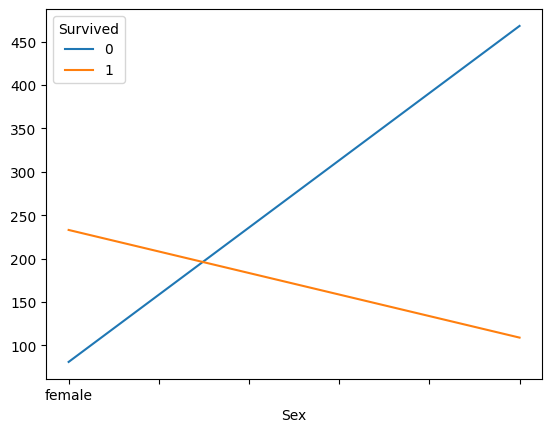

In [ ]:
plt.figure()
df.groupby('Sex')['Survived'].value_counts().unstack().plot()
plt.show()


Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

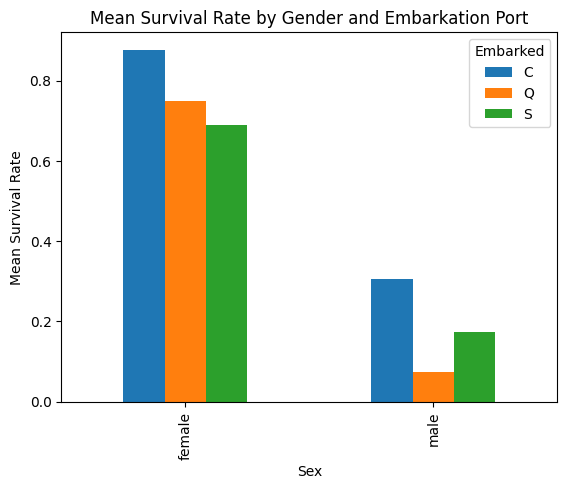

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Pandas File/Titanic-Dataset.csv')
pivot = df.pivot_table(index='Sex', columns='Embarked', values='Survived', aggfunc='mean')

pivot.plot(kind='bar')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Gender and Embarkation Port')
plt.show()
